## Backpropagation

### Part I. Classic

Do a forward pass (calculate green values), and a backward pass (calculate gradients, red
values).

![title](HA4_backprop.png)

### Part II. Some coding bits

In [290]:
def affine(x, w, b):
    return w * x + b
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
def gaussian(x):
    return np.exp(-x*x)
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))
def mse(y,yout):
    return np.mean((y-yout)*(y-yout))

In [291]:
x = 1.

##### initialization

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])

In [292]:
### do the forward pass of the network
z_2, z_3 = 0, 0
def forward():
    global z_2, z_3
    z_2 = ...
    h_1_2 = ...

    z_3 =  ...

In [293]:
z_3;

Is the output of the network close to the actual value?

In [295]:
#### DERIVATIVES CALCULATION
### enter your code here
dw_2 = ...
db_2 = ...

dw_1 = ...
db_1 = ...

##### WEIGHTS UPDATE
### enter your code here
w_1 = ...
w_2 = ...

b_1 = ...
b_2 = ...

In [296]:
### do again the forward pass of the network
...

Did output become closer to the actual value of the function?

### wrap things in to a loop

In [298]:
N = 50000
lr = 0.01

In [299]:
X = np.linspace(-5.0, 5.0, 500)

##### initialization

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])


for i in range(N):
    x = np.random.choice(X)
    actual = gaussian(x)
    #### FORWARD PASS
    ...

    #### DERIVATIVES CALCULATION
    dw_2 = ...
    db_2 = ...

    dw_1 = ...
    db_1 = ...

    ##### WEIGHTS UPDATE
    w_1 = ...
    w_2 = ...

    b_1 = ...
    b_2 = ...

Now let's plot things and see what they look like.

In [1]:
z1 = ...
z2 = ...

# Node outputs
h1 = ...
h2 = ...

z3 = ...
out = ...

In [ ]:
### Uncomment and run when z's and h's computed

# SIZE = 15

# fig, ax = plt.subplots(1,1, figsize=(14,10))

# ax.plot(X, gaussian(X), lw=4, ls = '-.', label='True function')
# ax.plot(X, out, lw=4, label='Perceptron')
# # ax.plot(x, h2, lw=4, label='Second neuron')

# # Set title
# ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# # Create labels (very important!)
# ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
# ax.set_ylabel('$y$', fontsize=SIZE)

# ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

# ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

### Classification problem

Fill out the code for the following classification problem. Implement:
- foward pass
- backward pass
- weight updates

In [301]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

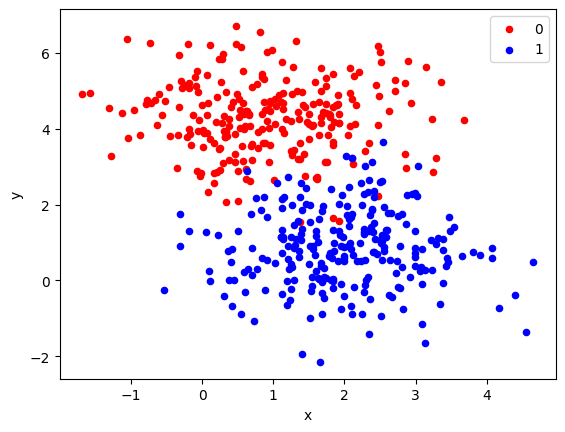

In [302]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [306]:
x = X_test

In [307]:
##### initialization ('ones')
w_1 = np.array([1, 1])
b_1 = np.array([1])

In [308]:
z1 = ...

# Node outputs
h1 = ...

### Check the accuracy

In [ ]:
pred = [int(score > 0.5) for score in h1]
sum(pred == y_test) / len(y_test)

### generalization ==> wrap into a proper loop

In [310]:
### Loop

In [311]:
N = 10000 # epochs

In [312]:
batch_size = 10 # 2, 4, 8, 16, 32, ... 10 is also an example

##### initialization

w_1 = np.array([1.,1.])
b_1 = np.array([1.])


for i in range(N):
    perm = np.random.permutation(len(X_train))
    X_train = X_train[perm]
    y_train = y_train[perm]

    for batch_id in range(int(len(X_train)/batch_size)):
        x = X_train[batch_id*batch_size:(batch_id+1)*batch_size]
        y = y_train[batch_id*batch_size:(batch_id+1)*batch_size]

        m = x.shape[0]
        #### FORWARD PASS
        z_1 = ...
        h_1 = ...


        #### DERIVATIVES CALCULATION
        dw1 = ...
        db1 = ...


        ##### WEIGHTS UPDATE
        w_1 = ...
        b_1 = ...

In [313]:
from sklearn.metrics import accuracy_score

In [ ]:
### check the accuracy on the test set
y_pred = sigmoid(X_test @ w_1 + b_1)
accuracy_score(y_test, y_pred > 0.5)